# Classification

## Overview

Classification is about assigning categories to objects. Consider the following example. 

<img src="images/classification_general.png" alt="Example for Classification" style="width: 500px;"/>

We have two images, one shows a whale in the sea in front of an iceberg, the other shows a bear in the woods. When we look at these pictures, we immediately see this, because we instinctively assign these categories to the images. Classification is a less powerful approximation of what we instinctively do. The main difference is that we need to work with a fixed and known set of categories. For example, our categories could be "whale picture", "bear picture", and "other image". The images can then be assigned to one of these three categories. The categories to which classification algorithms assign objects are commonly referred to as *classes*. Categories that are not part of the classes, e.g., if there is water in the image, are ignored. A bit more abstract, classification can be described as follows. 

<img src="images/classification_abstract.png" alt="Classification in general" style="width: 500px;"/>

We have objects for which we know a *concept*. When we apply our concept to the objects, we get the categories. For example, we have a concept that describes whales, which we can apply to images to determine if something is within the category whale. The task of classification algorithms is to derive a hypothesis that we can use to infer the class of objects from their features. Let us consider the features of the whale pictures. 

<img src="images/whale_hypothesis.png" alt="The whale hypothesis" style="width: 500px;"/>

Based on these features, we may derive the following hypothesis: *"Objects with fins, an oval general shape that are black on top and white on the bottom in front of a blue background are whales."* This hypothesis works reasonably well, even though there may also be other objects that fit the description, e.g., a submarine that with a black/white painting. This general approach is used by all classification algorithms. The form of the hypothesis, as well as the way the hypothesis is derived from data depends on the algorithm. 


### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} \{\phi(o): o \in O\}$ and a finite set of classes $C = \{class_1, ..., class_n\}$. 

The classification is defined by a *target concept* that maps objects to classes, i.e.,  $$h^*: O \to C.$$ The target concept is our ground truth, i.e., a perfect assignment of objects to the classes. Usually, we have no mathematical description for the target concept. For example, there is no such mathematical description for the classification of images as whale pictures and bear pictures. The *hypothesis* maps features to classes $$h: \mathcal{F} \to C.$$ The hypothesis is determined by a classification algorithm algorithm with the goal to approximate the target concept such that $$h^*(o) \approx h(\phi(o)).$$

### Scores

A variant of classification is that the hypothesis computes *scores* for each class $c \in C$. In this case, we a scoring function for each class of the form $$h_c': \mathcal{F} \to \mathbb{R}.$$ Scores are similar to *soft clustering*: instead of deciding for only a single class, the classification determines a value for each class, which we can use to evaluate how certain the algorithm is with the decision for a class. When we want to assign the class based on the scores, we usually just assign the class with the highest score. Thus, we have $$h(x) = \arg\max_{c \in C} h_c'(x)$$ for $x \in \mathcal{F}$. 

Often, the scores are probability distributions, i.e., the scores for each class are in the interval [0,1] and the sum of all scores is 1, i.e., $$\sum_{c \in C} h_c'(x) = 1$ for all $x \in \mathcal{F}.$$ 

### Binary Classification and Thresholds

A special case of classification problems is where we have exactly two classes. While this is a strong restriction, there are many problems that can be solved using binary classification. For example, the prediction if a borrower will pay back money, the prediction if a transaction is fraudulent, or the prediction of whether an email is spam or not. 

For binary classification, we usually say that one class is *positive* and the other class is *negative*. Thus, we have exactly two classes. If we have only two classes $C = \{positive, negative\}$ and the scores, we can calculate the score of one class based on the score of the other class, in case the scores a probability distribution, i.e., $$h_{negative}'(x) = 1-h_{positive}'(x)$$ because the sum of the probabilities is one. Because it is sufficient to use the scoring function for the $positive$, we use the notation $h'(x) = h_{positive}$ for binary classification. In this case, we can also use a *threshold* $t \in [0,1]$ to determine the classes from the scoring function instead of just taking the class with the highest score. If $h'(x) \geq t$, $x$ is positive, if the score is less than the threshold it is negative, i.e., 
$$h_t(x) = \cases{ positive & if $h'(x) \geq t$ \\ negative & if $h' < t$ }$$

Why thresholds and scoring functions are important for classification is best demonstrated through an example. The histogram below shows the scores of instances of a spam detection simulation where positive means that an email is spam. 

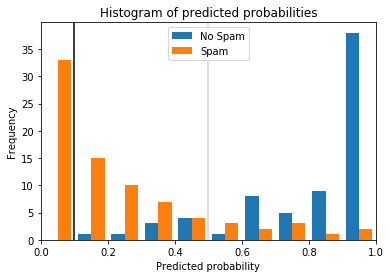

In [23]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# generate sample data
X, y = make_blobs(n_samples=300, centers=2, center_box=(0, 1),
                  cluster_std=0.3, random_state=1)

# split the data into 50% training data and 50% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# predict scores with a random forest
classifier = RandomForestClassifier()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

plt.figure()
plt.hist([y_score[y_test==1,1], y_score[y_test==0,1]], bins=10, label=['No Spam', 'Spam'])
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.axvline(0.5, color='lightgray')
plt.axvline(0.1, color='black')
plt.legend(loc="upper center")
plt.show()

The orange bars show the scores of spam emails, the blue bars the scores of other emails. Without picking a specific threshold, we would just predict the class with the highest score. This is the same as a threshold of 0.5, indicated by the gray line. This would mean that most emails would be predicted correctly but there would be some emails that would not be flagged as spam, even though they are, and some emails that are flagged as spam, even though they are not. These are different types of errors, and they are not equal in this use case. While spam is annoying, deletion of the spam emails is not a lot of effort, unless there are hundreds of spam emails. On the other hand, even a single email that is mistakenly flagged as spam and not shown to the recipient can have strong negative consequences. We can solve this problem by picking a suitable threshold. The black line indicates a threshold of 0.1. With this threshold, only spam emails would be flagged as spam. While more spam emails would not be detected, at least all normal emails would pass through the spam filter. Thus, classification with scoring and a suitable threshold can make the difference between solving a problem and building a model that is unsuitable for the use case.  

## Performance Metrics

The key question of classification is how good the hypothesis $h$ approximates the target concept $h^*$. Usually, we do not get perfect solution, which means that there are some instances that are predicted incorrectly by the hypothesis. The spam example above already demonstrates that there are different kinds of mistakes. The basis for any performance evaluation of classification models is the use test data. The hypothesis is applied to the features of the test data. From this, we get a prediction result we can compare with actual classes. The following table shows the five features of two instances of our image classification example, the actual class, and the prediction. 

| shape | top color | bottom color | background color | has fins | class | prediction |
|-------|-----------|--------------|------------------|----------|-------|------------|
| oval  | black     | black        | blue             | true     | whale | whale      |
| rectangle | brown | brown        | green            | false    | bear  | whale      |
| ...   | ...       | ...          | ...              | ...      | ...   | ...        |

The first instance is predicted correctly, the prediction of the second instance is incorrect. If there are thousands or even millions of instance in the test data, we cannot evaluate the prediction by looking at such a table. Instead, we need to summarize the comparison between the classes and the prediction. 

### The Confusion Matrix

The most important tool for the analysis of the quality of hypothesis is the *confusion matrix*, a tabular description of how often the hypothesis is correct and how often it is incorrect, i.e., confused. The confusion matrix four our image classification example may look like this. 

<table>
    <tr><td></td><td colspan=4><b>Actual class</b></td></tr>
    <tr><td rowspan=4><br><br><b>Predicted class</b></td><td><td><b>whale</b></td><td><b>bear</b></td><td><b>other</b></td></tr>
    <tr><td><b>whale</b></td><td>29</td><td>1</td><td>3</td></tr>
    <tr><td><b>bear</b></td><td>2</td><td>22</td><td>13</td></tr>
    <tr><td><b>other</b></td><td>4</td><td>11</td><td>51</td></tr>
</table>

The confusion matrix basically counts how often each instance of each class is predicted as which class. For example, how often whales are predicted as whales, how often they are predicted as bears, and how often they are predicted as something else. The columns are the actual values of the classes, i.e., the target concept. The rows are the predicted values, i.e., the hypothesis. In the example, we have 35 actual pictures of whales. This is the sum of the values in the first row. 29 of these whale pictures are predicted correctly, 2 are incorrectly predicted as bears, 4 are incorrectly predicted as something else. Thus, the confusion matrix gives us detailed statistical information about how many instances we have and how they are predicted. Values on the diagonal of the confusion matrix are the correct prediction, the other values show incorrect predictions. 

### The Binary Confusion Matrix

The binary confusion matrix is the special case of the confusion matrix for binary classification problems with the classes true and false. In general, the binary confusion matrix looks like this. 

<table>
    <tr><td></td><td colspan=3><b>Actual class</b></td></tr>
    <tr><td rowspan=3><br><br><b>Predicted class</b></td><td><td><b>true</b></td><td><b>false</b></td></tr>
    <tr><td><b>true</b></td><td>true positive (TP)</td><td>false positive (FP)</td></tr>
    <tr><td><b>false</b></td><td>false negative (FN)</td><td>true negative (TN)</td></tr>
</table>

Thus, we have actually positive and negative classes and depending on whether the prediction is correct or not, we get true positives (TP), true negatives (TN), false positives (FP), or false negatives (FN). The binary confusion matrix is well known and not only used for the evaluation of machine learning, but also, e.g., in medical studies to evaluate the quality of tests. From medical studies also originate the terms *type I error* and *type II Error*. The type I error are the false positives. In medicine, this could mean a mistakenly positive result of an antibody test for an illness that may lead to the wrong conclusion that a person as antibodies for the illness. The type II errors are the false negatives. In medicine, this could mean a mistakenly negative result of an antibody test with the wrong conclusion that there are no antibodies. In the spam example, emails mistakenly flagged as spam would be false positives, the spam emails that are missed would be false negatives. 

### Binary Performance Metrics

We can define performance metrics that summarize aspects of the performance of a hypothesis in a single statistical marker. There are many different performance metrics that all measure different aspects of the performance. The table below lists eleven such metrics. 

| Metric | Description | Definition |
|--------|-------------|------------|
| True positive rate, recall, sensitivity | Percentage of positive instances that are predicted correctly. | $TPR = \frac{FP}{TP+FN}$ |
| True negative rate, specificity | Percentage of negative instances that are predicted correctly. | $TNR = \frac{TN}{TN+FP}$ |
| False negative rate | Percentage of positive instances that are predicted incorrectly as negative. | $FNR = \frac{FN}{FN+TP}$ |
| False positive rate | Percentage of negative values that are predicted incorrectly as positive. | $FPR = \frac{FP}{FP+TN}$ |
| Positive predictive value, precision | Percentage of positive predictions that are predicted correctly. | $PPV = \frac{TP}{TP+FP}$ |
| Negative predictive value | Percentage of negative predictions that are predicted correctly. | $NPV = \frac{TN}{TN+FN}$ |
| False discovery rate | Percentage of positive predictions that are predicted incorrectly because they should be negative. |$FDR = \frac{FP}{TP+FP}$ |
| False omission rate | Percentage of negative predictions that are predicted incorrectly because they should be positive. | $FOR = \frac{FN}{FN+TN}$ |
| Accuracy | Percentage of correct predictions. | $accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ |
| F1 measure | Harmonic mean of recall and precision. | $F_1 = 2\cdot\frac{precision \cdot recall}{precision+recall}$ |
| Matthews correlation coefficient (MCC) | Correlation between the prediction and the actual values. | $MCC = \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(FP+FN)(TN+FP)(TN+FN)}}$ |

Since there is an abundance of metrics, the question is still which metrics to use. The evaluation of eleven performance markers at the same time, many of which are strongly correlated, because they are all computed from the same four values from the confusion matrix, does not make sense. However, there is a logic behind these metrics, that can help with the decision which metrics should be used in a given projects. 

The first four metrics are rates in relation to the actual values. They can be used to answer the question "how much of my positive/negative data is labeled correctly". The combination of TPR and TNR is very important as these two metrics cover two questions that are important for many use cases: how many of the positives are found and how many of the negatives are found correctly? Consequently, these are well suited to evaluate the type I error and type II error, which are important in many fields, especially medicine. The other two metrics, the FPR and the FNR are the counterparts and can be directly calculated from as $FPR=1-TNR$ and $FNR=1-TPR$. 

The next four metrics are rates in relation to the predictions. They can be used to answer the question "how many of my predictions are labeled correctly". The difference to the first four metrics is that the quality of the results is measured in relation to the predicted classes, not the actual classes. Otherwise, these metrics are relatively similar to the first four metrics.

A common property of the first eight metrics is that they should never be used on their own, i.e., you must never use only one of these metrics as the single criterion for optimization. The reason is that the first four metrics only consider one column of the confusion matrix, the second four metrics consider only one row. This means that if only one of them is used, the other column/row is ignored. As a consequence, *trivial hypotheses* are sufficient to achieve optimal results. What this means is best explained with a simple example. Consider you only want to optimize the TPR and no other metric. A trivial hypothesis that predicts everything as positive would be perfect, because the TPR would be one. However, this model would not be helpful at all. To avoid this, you must ensure that you use metrics that use at least that use at least three of the four values in the confusion matrix. 

Alternatively, you may also use metrics that do not only evaluate a single aspect of the hypothesis, but rather try to evaluate to overall performance. The last three metrics are examples for such metrics. These metrics use the complete confusion matrix to estimate the performance of the classifier. The accuracy measures the percentage of prediction that are correct. This is similar to the first four metrics, but not for a single class, but rather for both classes at once. The drawback of the accuracy is that it may be misleading in case of *class level imbalance*. Class level imbalance is the problem when you have much more data of one class, than of the other class. For example, consider the case where you have 95% of data in the negative class and only 5% in the positive class. A trivial hypothesis that predicts everything as negative would achieve an accuracy of 95%, which sounds like a very good result. However, there is no value in such a model. Thus, accuracy should be used with care and only in case the classes are balanced, i.e., about the same amount of data from each class if available. 

The F1 measure uses a different approach and is actually the *harmonic mean* mean of the TPR/recall and PPV/precision. Thus, it takes the ratio of of positive instances that are correctly identified and the ratio of positive predictions that actually should be positive into account. The harmonic mean is often used instead of the arithmetic mean for the comparison of rates. The F1 measure works well even in case of imbalanced data, because there is usually a trade-off between precision and recall assuming that a perfect prediction is impossible. To increase the recall, more positive predictions are required. However, in case the prediction is imperfect, this means that there will also be more false positives, which may decrease the recall. Thus, optimizing for the F1 measure is the same as optimizing for a good balance of true positives and false positives in case of imperfect predictions. 

The last metric in the table above is MCC and directly measures the correlation between the expected results and predictions. Basically, the MCC measures if the rates of correct positive and negative predictions correlate well with the expected result. The MCC is very robust against class level imbalance and generally works very well. The main drawback of MCC is that the value cannot be easily interpreted. The metrics above all have an easy natural language explanation that can easily be explained to non-data scientist. MCC lacks such a simple explanation. This also makes it harder to evaluate how high MCC should be, in order for a hypothesis to achieve a sufficiently high performance. This is made worse because in contrast to all other metrics above, the values of MCC are not in the interval [0,1], but rather between [-1, 1], because it is a correlation measure. A high negative value means that our hypothesis does the opposite of what it should be doing. Depending on the context, this may mean that the hypothesis is very good, if you just invert all results of the hypothesis. Thus, both large negative values and large positive values are good. In conclusion, MCC is a very robust and informative metric, but requires more training for the correct use than the other metrics we discussed above. 

### Receiver Operator Characteristics (ROC)

All performance metrics we considered so far were based on the confusion matrix and did not account for scoring of classifiers. The drawback of the confusion matrix is that it can only be calculated for a fixed threshold $t$ for a score based hypothesis $h'$. How the values of the performance metrics change with different values for the threshold $t$ is not accounted for. One way to consider how different thresholds affect the performance of a hypothesis are ROC curves. A ROC curve represents possible combinations of the TPR and the FPR for different thresholds $t$. For example, a ROC curve may look like this. 

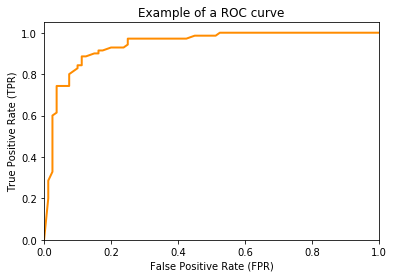

In [3]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, t = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Example of a ROC curve')
plt.show()

The ROC curve shows the FPR on the x-axis and the TPR on the y-axis. The ROC curve shows which different trade-offs between FPR and TPR are possible for different thresholds. Since good hypothesis achieve a high TPR and a low FPR, the optimal performance is in the upper-left corner of the plot where FPR is 0 and TPR is 1. This would be a perfect result without any misclassifications. The ROC curve can be used to pick a suitable combination of TPR and FPR for a use case. For example, if a TPR of at least 0.8 is required, we can see that we could achieve an FPR of 0.05, marked with a circle in the plot allow. 

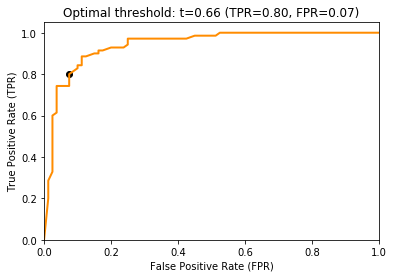

In [4]:
index = 0
while tpr[index]<0.8:
    index += 1

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.scatter(fpr[index], tpr[index], color='black', marker='o')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Optimal threshold: t=%.2f (TPR=%.2f, FPR=%.2f)' % (t[index], tpr[index], fpr[index]))
plt.show()

### Area Under the Curve (AUC)

The Area Under the Curve (AUC) is a performance metric based on the ROC curve. The ROC curve is a great tool for the visual analysis of the impact of different thresholds as well as for the selection of suitable thresholds if there is a desired goal for the TPR or FPR. The AUC computes a single value based on the ROC curve that estimates how well the hypothesis performs independent of any specific threshold. The idea behind the AUC is quite simple. If the best combinations of TPR and FPR are in the upper-left corner of the ROC curve, this means that the performance is better if the area under the curve increases. Thus, if we integrate the area under the ROC curve, we can estimate how well a classifier performs. Hence, the name: we have the area under the (ROC) curve. 

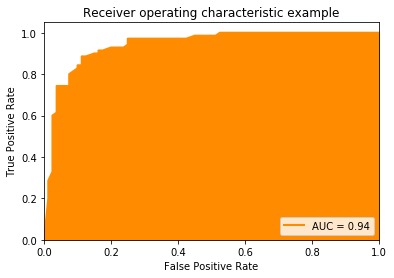

In [5]:
# Plot ROC Curve with AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, 0, tpr, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The closer the AUC value is to one, the better the performance of our classifier. In terms of interpretation, AUC has similar problems as MCC: while a value of 1 is optimal, the worst value is not 0, but rather 0.5. This is because if we just randomly guess if we have a positive or a negative instance, the TPR equals the FPR, which is the diagonal of the ROC curve. Thus, an AUC value of 0.5 represents random guessing. A value of 0 means that we have a TPR of 0 and an FPR 1. Same as for negative values of MCC, we could just do the opposite of the hypothesis and get a perfect result. Consequently, values of AUC are better, the farther they are away from 0.5. 

### Micro and Macro Averages

All performance metrics we discussed so far are defined using the binary confusion matrix. While the concept of accuracy can be generalized to more than two classes, because it the percentage of correctly classified classes, this is not easily possible with the other metrics. However, we can define multiple binary confusion matrices from a non-binary confusion matrices. Consider our confusion matrix with three classes from above.

<table>
    <tr><td></td><td colspan=4><b>Actual class</b></td></tr>
    <tr><td rowspan=4><br><br><b>Predicted class</b></td><td><td><b>whale</b></td><td><b>bear</b></td><td><b>other</b></td></tr>
    <tr><td><b>whale</b></td><td>29</td><td>1</td><td>3</td></tr>
    <tr><td><b>bear</b></td><td>2</td><td>22</td><td>13</td></tr>
    <tr><td><b>other</b></td><td>4</td><td>11</td><td>51</td></tr>
</table>

We can define three confusion matrices from this confusion matrix, in each of which one class is positive and all other classes negative. Here is the example with whale as positive class.  

<table>
    <tr><td></td><td colspan=3><b>Actual class</b></td></tr>
    <tr><td rowspan=3><br><br><b>Predicted class</b></td><td><td><b>whale</b></td><td><b>not whale</b></td></tr>
    <tr><td><b>whale</b></td><td>$TP_{whale} = 29$</td><td>$FP_{whale} = 5$</td></tr>
    <tr><td><b>not whale</b></td><td>$FN_{whale} = 6$</td><td>$TN_{whale} = 97$</td></tr>
</table>

We can calculate all performance metrics from above now individually for all classes, e.g., the TPR for the class whale as
$$TPR_{whale} = \frac{TP_{whale}}{TP_{whale}+FN_{whale}}.$$

If we want to get performance metrics for all classes at once, we can use *macro averaging* and *micro averaging*. The macro average of a performance metric is the arithmetic mean of the metric applied individually for all classes. For example, for the TPR the macro average is defined as $$TPR_{macro} = \frac{1}{|C|}\sum_{c \in C}\frac{TP_{c}}{TP_{c}+FN_{c}}.$$

With micro averaging, the performance metric is calculated directly by changing the formulas to use the sum of all classes. For example, the micro average is defined as $$ TPR_{micro} = \frac{\sum_{c \in C} TP_C}{\sum_{c \in C} TP_C + \sum_{c \in C} FN_C}.$$

Whether the macro average or the micro average is a better choice depends on the use case and the data. If the data is balanced, i.e., there is a similar amount of data for each class, the results for the macro average and the micro average will be almost the same. When the data is imbalance, i.e., there are classes for which there a fewer instances than others, the macro average will treat all classes the same. Because the macro average is the arithmetic mean of the performance metrics for each class, the impact on the average is the same for all classes. This is not the case for the micro average, where classes with less instances have a smaller impact, because the count is lower and the individual counts are used. 

Thus, in case of class level imbalance, the macro average has the advantage that all classes are fairly represented in the average. The drawback of this is that classes with only few instances may have an overly large impact on the macro average. Vice versa, the impact on the micro average of each class is only as large as the number of instances for the class, but there is a risk that classes with few instances may be ignored. 

### Beyond the Confusion Matrix

All metrics above are defined using the confusion matrix. This is the standard approach for performance estimation in the machine learning literature. However, while such metrics are common and often have a relation to use cases, they all have one assumption, which is usually unrealistic: all errors are equal. In practice, some errors matter more than other errors. For example, lending a huge amount of money to a customer caries a greater risk than a small loan. If a customer defaults on a large loan, the impact of a false positive credit score is thus larger than for a small loan. Therefore, it is always a good idea to think about concrete costs, benefits and risks associated with the true positives, false positives, true negatives, and false negatives and ideal define a cost matrix that specifies how the individual gains and losses for each of these cases. This way, you can define a customized cost function for use cases, which usually means that you get more meaningful results, e.g., [demonstrated here](https://www.kdnuggets.com/2016/12/salford-costs-misclassifications.html).

## Decision Surfaces

We will use a visual aid to demonstrate how different algorithms decide how data is classified: the *decision surface*. The decision surface uses colors to show the class of data. The drawback of decision surfaces is that they can only be (easily) used with two dimensional data. We will use the sepal length and sepal width of the Iris data as sample data to train classifier.

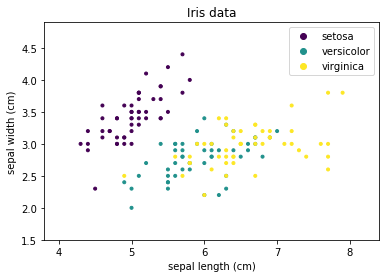

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

X, Y = load_iris(as_frame=True, return_X_y=True)
class_names = load_iris().target_names.tolist()
X = X.iloc[:, 0:2] # use only first two columns from iris data

plt.figure()
plt.xlim(X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5)
plt.ylim(X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5)
scatter = plt.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Iris data')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()

We can see that Setosa is clearly separated, while there is overlap between Versicolor and Virginica. We will colorize the background of the above plot with the classes that the classifiers predict to visualize the decision surface: purple background for Setosa, teal for Versicolor, and yellow for Virginica. We demonstrate this with a simple example:

- All instances with sepal length less than 5.5 are predicted as Setosa.
- All instances with sepal length between 5.5 and 6 are Versicolor. 
- All instances with sepal length greater than 6 are Virginica. 

This classifier would result in the following decision surface.

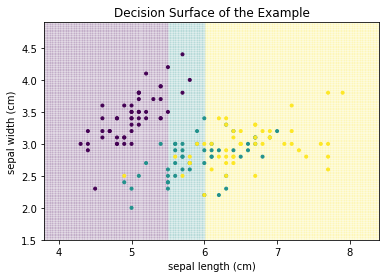

In [3]:
import numpy as np

class DummyModel:
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        result = np.ones(len(X))     # init everything as versicolor
        result[X[:,0]<5.5] = 0 # rule for Setosa
        result[X[:,0]>6]   = 2 # rule for Virginica
        return result

def plot_decision_surface(model, X, Y, ax=None, title=None):
    h = .01 # step size in the mesh
    x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
    y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    model.fit(X, Y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.pcolormesh(xx, yy, Z, alpha=0.04)
    ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    if title is None:
        title = str(model)
    ax.set_title(title)
    
plot_decision_surface(DummyModel(), X, Y, title='Decision Surface of the Example')

The line where the color changes is called the *decision boundary*.

## $k$-Nearest Neighbor

The first classification algorithm we consider is based on the idea that instances of the same class are close to each other. This is similar to the intuition behind clustering algorithms that use the distance to estimate the similarity of instance. The simplest approach is that each instance is classified based on the nearest neighbor, i.e., the instance in the training data that is closest. For the Iris data, this would lead to the following decision surface. 

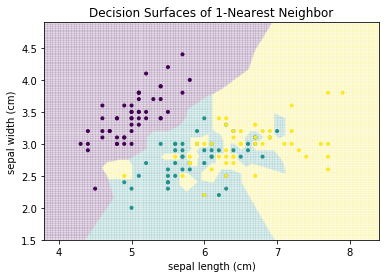

In [8]:
from sklearn.neighbors import KNeighborsClassifier

plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y, title="Decision Surfaces of 1-Nearest Neighbor")
plt.show()

We can generalize this concept to $k$-Nearest Neighbors: the class is the result of voting between the $k$ instances that are closest to the instance where we want to predict the class. The following figure shows how the decision surface changes with different values for $k$. 

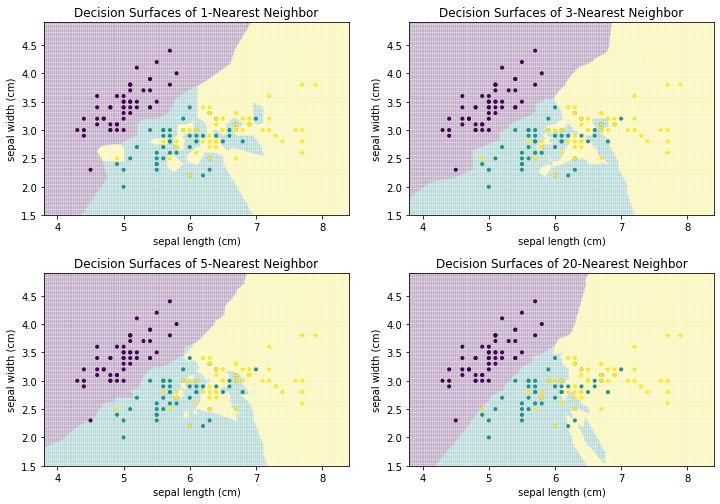

In [9]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y,
                      title="Decision Surfaces of 1-Nearest Neighbor", ax=axes[0, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=3), X, Y,
                      title="Decision Surfaces of 3-Nearest Neighbor", ax=axes[0, 1])
plot_decision_surface(KNeighborsClassifier(n_neighbors=5), X, Y,
                      title="Decision Surfaces of 5-Nearest Neighbor", ax=axes[1, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=20), X, Y,
                      title="Decision Surfaces of 20-Nearest Neighbor", ax=axes[1, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

We can see that there is no clear structure in the decision surface of the $k$-Nearest Neighbor classifier. The decisions boundaries have many sharp edges and do not look regular, e.g., like they are the result of a differentiable curve. This is because $k$-Nearest neighbor does not calculate a hypothesis that is some mathematical generalization of the data. Instance, we have an *instance-based* algorithm, where that defines the decision boundaries by direct comparisons between instances. When we compare how the result evolves with larger values of $k$ we see that single points have a smaller influence. For example, with $k=1$, there is a single yellow instance on the left side of the plot, which looks like an outlier. This outlier leads to a relatively large area that is yellow, where this region should clearly be rather purple or teal. With the larger neighborhood sizes, this effect vanishes. on the other hand, large neighborhood sizes mean that instances that are further away can participate in the voting. With $k=20$ this leads to a relatively sharp boundary between teal and yellow, because not the points close to the boundary have the largest influence, but rather the points behind them. As soon as there are more yellow than teal points, the decision surface stay yellow. In comparison, with the smaller neighborhood size there are "islands" of teal within the yellow area. The following plots show how the neighborhood of the point (6,3.5) changes, which also means that the classification changes. 

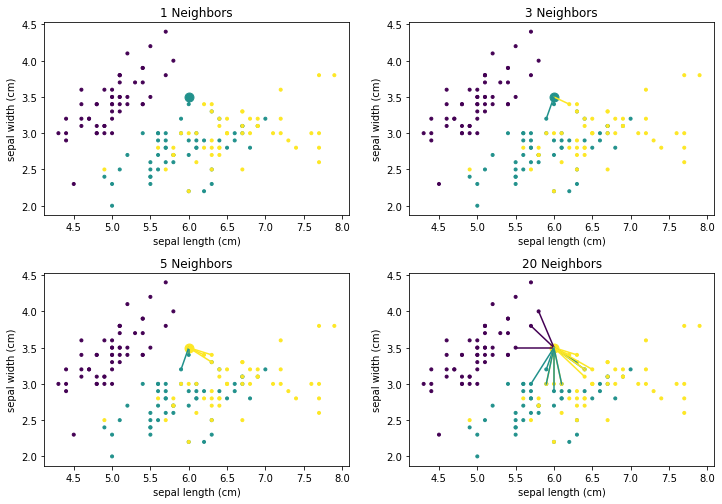

In [10]:
from sklearn.neighbors import NearestNeighbors

def plot_neighborhood(X, Y, k, pnt, ax=None):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    _, pnt_neighbors = nbrs.kneighbors(pnt)
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X, Y).predict(pnt)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    sc = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    for i in range(0,k):
        pnt2 = X.iloc[pnt_neighbors[0][i]].values
        ax.plot([pnt[0][0], pnt2[0]], [pnt[0][1], pnt2[1]], color=sc.to_rgba(Y.iloc[pnt_neighbors[0][i]]))
    ax.scatter(pnt[0][0], pnt[0][1], s=80, color=sc.to_rgba(Y_pred[0]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title('%i Neighbors' % k)
    
pnt = [[6, 3.5]]
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_neighborhood(X, Y, 1, pnt, ax=axes[0,0])
plot_neighborhood(X, Y, 3, pnt, ax=axes[0,1])
plot_neighborhood(X, Y, 5, pnt, ax=axes[1,0])
plot_neighborhood(X, Y, 20, pnt, ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

## Decision Trees

Imagine trying to explain why you want to buy a certain car. You are likely describing features of the car that were your criteria for the decision: a car with at least five doors, a certain amount of horse power, etc. Some of these criteria are more important than others, i.e., you apply them first for selecting your car. This is the intuition behind a decision tree: logical rules are applied to features to make decisions about the class of instances. These decisions are structured in a tree as follows.

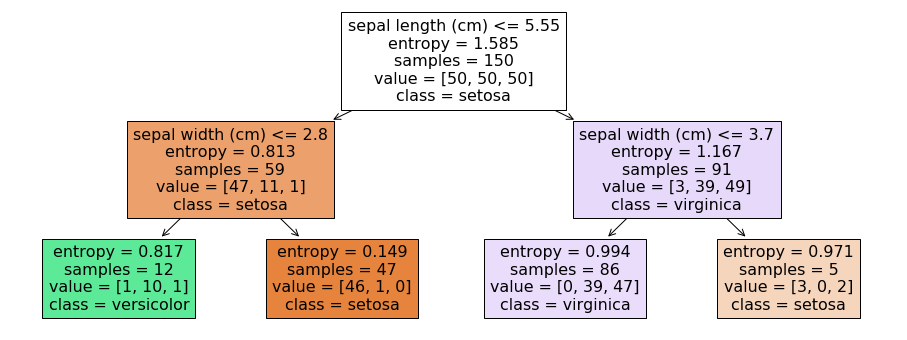

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, Y)
plt.figure(figsize=(16,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In the example, the first decision is made about the sepal length. If it is less than or equal to 5.45, we go to the left side of the tree, if if is greater than 5.55, we go the the right side of the tree. We also see more information in the nodes of the tree. We ignore the entropy for now. Samples are the number of instance in the training to, based on which this decision was learned. Value are the number of instances of each class within the samples. In the first node (which is also called the root node), we have 150 samples, 50 of each class. The decision tree then just decides on the first class observed in the data, which is setosa in this case. The data is then partitioned based on the logical rule. 59 instances, 47 of which are Setosa have a sepal length less than or greater to 5.55, 91 instances have a sepal length greater than 5.55, 39 of which are Versicolor, 49 are Virginica. This shows the value of the decision trees: not only do we understand how decisions are made about the features, we also see the effect of the decisions on the data. The nodes on the lowest layer of the tree are called leaf nodes. 

The decision surface of the above tree looks as follows. 

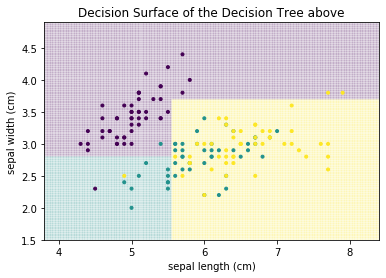

In [12]:
plot_decision_surface(clf, X, Y, title="Decision Surface of the Decision Tree above")
plt.show()

We can see that the decision boundaries that separate the decision surface between the classes are parallel to the axes. This is a general property of decision trees: because we have logical decision, usually of the form $leq$ or $geq$, the resulting partitions of the data are always cutting the current partitions in half in orthogonal to the axis of the feature and parallel to all other axes.

The general idea how decisions trees are learned is based on a relatively simple recursive algorithm:

1. Stop if the data is "pure", the amount of data is "too small", or the maximum depth is reached.
2. Determine "most informative feature" $X'$
3. Partition training data using $X'$
4. Recursively create subtree for each partition starting with step 1.

Thus, the general idea is to find the "most informative feature", partition the data using this feature, and repeat this until the data is "pure" or there is not amount of data left in the partition and the data is "too small". The concept of "too small" is always the same: if the number of instances is below a certain threshold, the recursion stops. A similar criterion is the maximum depth. This can be used to define a hard limit on the complexity of the tree. The depth of the tree is defined as the maximum number of decisions that are made, before the class is determined. For the purity and the most informative features, there are different concepts. Which concept is used and how exactly the partitions are determined depends on the variant of the decision tree, e.g., CART, ID3, or C4.5.

Here, we want to briefly present how these concepts can be implemented based on *information theory*. The idea is to describe purity as the uncertainty in the data and the most informative feature based on the *information gain* if this feature is known. Information theory deals with the uncertainty of random variables. Therefore, we consider everything as random variable: the classification of instances is a discrete random variable C, our features are random variables $X_1, ..., X_m$. The core concept of information theory is the entropy of random variables. The higher the entropy, the more random a decision. For example, the entropy of flipping a fair coin that has a fifty percent probability for both heads and tails is 1. The entropy for an unfair coin that always lands on heads is 0. Thus, if we want to make informed decision with a high certainty, we want to find partitions of the data which minimize the entropy of the classification $C$. The definition of this entropy is

$$H(C) = -\sum_{c \in C} p(c) \log p(c)$$

where $p(c)$ is the probability of observing the class $c$ in the partition. If this entropy is below a defined threshold, the data is "pure". 

The *conditional entropy* tells us the uncertainty of the classification, if we know have perfect information about a feature and is defined as

$$H(C|X') = -\sum_{x \in X'} \sum_{c \in C} p(c|x) \log(p|x)$$

where $p(c|x)$ is the probability of observing the class $c$ given the value $x$ of the feature $X' \in \{X_1, ..., X_m\}$. Thus, the conditional entropy is a measure for how much information about the classification if contained in the feature $X'$. The lower the conditional entropy, the small the uncertainty about the classification if the feature is known. Thus, features are more *informative*, if the conditional entropy is smaller. When we combine the entropy of the classification and the conditional entropy of the classification if a feature is known, we get the *information gain* as the reduction in uncertainty, i.e., 

$$I(C; X') = H(C)-H(C|X').$$

Thus, the most informative feature is the feature that maximizes the information gain. Once the feature is determined, the algorithms decide on a logical rule to create the partitions.

The example of the decision surface above was for a very low depth, i.e., we only allowed two decisions. While this is useful to display the structure of the decision tree and explain how the decision surface looks like, most problems require decision trees with greater depth. If we do not limit the depth and define what "too small" means, we get a decision tree with the following decision surface. 

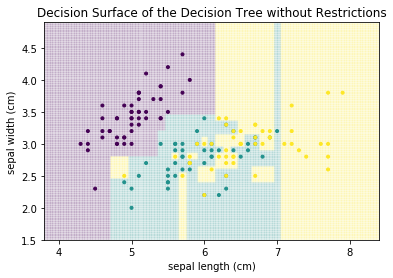

In [13]:
plot_decision_surface(DecisionTreeClassifier(), X, Y, title="Decision Surface of the Decision Tree without Restrictions")
plt.show()

We can see that there are many more decisions. More importantly, we can see that *overfitting* occured. For example, there is a small teal area at the sepal length 7, that cuts right through the yellow area, just because there is a single teal instance. Similarly, there is are several very small yellow rectangles in the center of the plot that cut single points out of the teal area. These are all typical examples of overfitting. Decision trees tend to overfit data, if the number of decisions (i.e., the depth) and/or the minimal number of samples required in a partition is not limited. If we limit the tree such that we allow only leaf nodes that have at least 5 instances, we get the following result. 

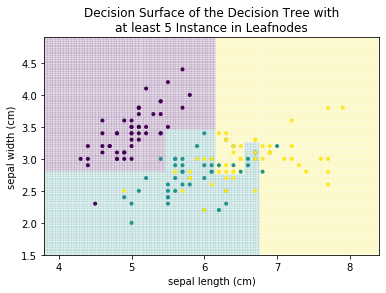

In [14]:
plot_decision_surface(DecisionTreeClassifier(min_samples_leaf=5), X, Y, title="Decision Surface of the Decision Tree with\nat least 5 Instance in Leafnodes")
plt.show()

## Random Forests

The general idea behind random forests is to combine multiple decision trees into a single classifier. This is known as *ensemble* learning, i.e., a random forest is an ensemble of decision trees. Below, you see how a random forest may be created from four decision trees. 

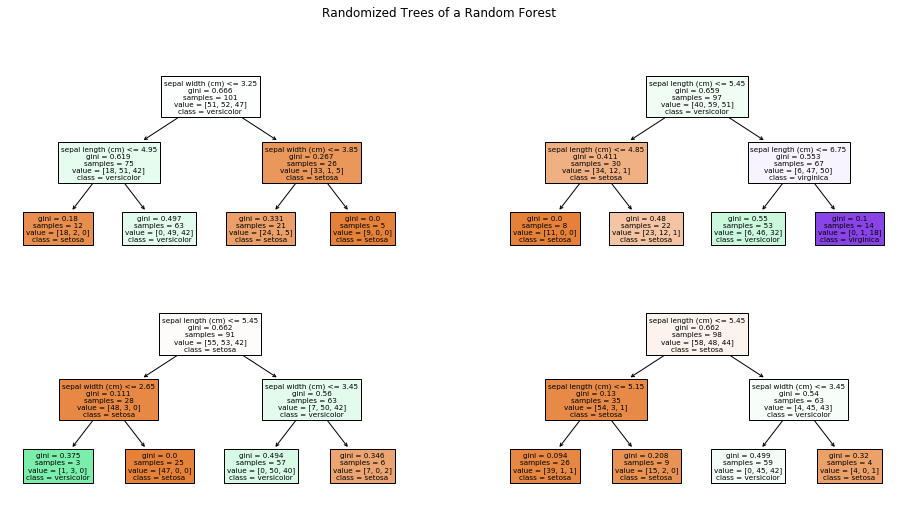

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Please note that the parameters we use here are not good and should not be used
# for any real examples. We use only four random trees so that we can better demonstrate 
# the example. Usually, you should use hundreds of trees and more are better, but require
# more runtime (both for training and predictions). 
randomforest = RandomForestClassifier(n_estimators=4, max_depth=2, random_state=42)
randomforest.fit(X, Y)

f, axes = plt.subplots(2, 2, figsize=(16, 8))
plot_tree(randomforest.estimators_[0], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[0,0])
plot_tree(randomforest.estimators_[1], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[0,1])
plot_tree(randomforest.estimators_[2], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[1,0])
plot_tree(randomforest.estimators_[3], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[1,1])
plt.suptitle("Randomized Trees of a Random Forest")
plt.show()

Each of these decision trees on its own is bad. This is further highlighted when we look at the decision surfaces of the four trees. 

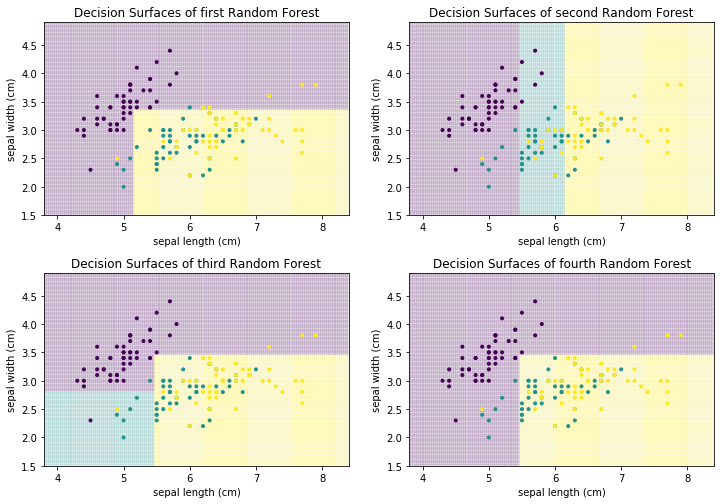

In [16]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(randomforest.estimators_[0], X, Y, title="Decision Surfaces of first Random Forest", ax=axes[0,0])
plot_decision_surface(randomforest.estimators_[1], X, Y, title="Decision Surfaces of second Random Forest", ax=axes[0,1])
plot_decision_surface(randomforest.estimators_[2], X, Y, title="Decision Surfaces of third Random Forest", ax=axes[1,0])
plot_decision_surface(randomforest.estimators_[3], X, Y, title="Decision Surfaces of fourth Random Forest", ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

For example, the first and fourth decision tree both never classify anything as Virginica (teal). Thus, individually, we have four *weak classifier*. However, if we combine the results of the four classifiers and output the average prediction of each tree, we get the following. 

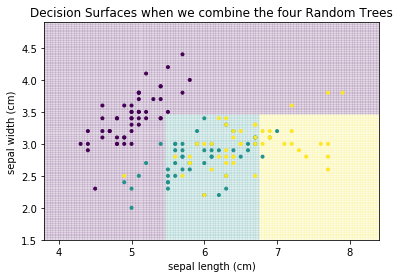

In [17]:
plot_decision_surface(randomforest, X, Y, title="Decision Surfaces when we combine the four Random Trees")
plt.show()

This is a much better result, even though this is only based on four weak classifiers. This concept, to build a *strong classifier* by averaging over many weak classifier is comparable to the audience joker of Who Wants to be a Millionaire. Individually, the audience is a weak help. However, because the questions are in a way that often most people guess the correct answer, the average prediction of the group is reliable. The same is true in this example. Individually, the four decision trees are bad. However, some are good at identifying purple, others at yellow. Taken together, the individual strengths add up and cancel out the weaknesses. Usually, this is not done with four trees, but with hundreds, or even thousands of trees. Below, you can find the result with 1000 trees.

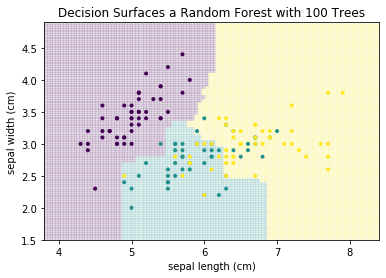

In [18]:
plot_decision_surface(RandomForestClassifier(n_estimators=1000, max_depth=2), X, Y, title="Decision Surfaces a Random Forest with 100 Trees")
plt.show()

The explanation of random forest so far is only for the *ensemble* nature of the approach, i.e., how a strong classifier is created from many weak classifier. The open question is, how does the random forest determine different decision trees from the same data, that are used as weak classifier? In general, the algorithms for the training of decision tree are deterministic, i.e., if you run the algorithm twice on the same data, you get twice the same decision tree. Therefore, we must explore how the training of decision trees is randomized by random forests. 

We get our first indicator for this, when we look at the individual weak learners. Here is the first of the four decision trees from above. 

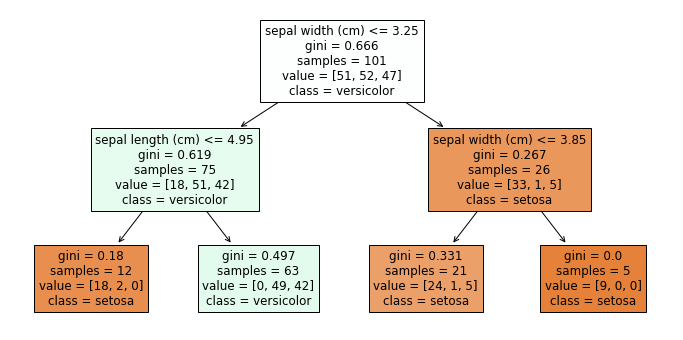

In [19]:
plt.figure(figsize=(12,6))
plot_tree(randomforest.estimators_[0], filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

We observe that the number of samples in the first node is 101 and we have 51 Setosa, 52 Versicolor, and 47 Virginica. This means that this is not our original Iris data. What we observe is the first randomization of the training of the decision trees in random forests: the training data is a so called *bootstrap sample* of the original data. This means that if we have 150 instance in our training data, we randomly draw with replacement 150 instances from our training data. Because we draw with replacement, we will have some instances multiple times, and other instances will not be part of the bootstrap sample. On average, we expect that we draw about 63.2% unique instances from the original data, the remaining data will be duplicates. Thus, all decision trees in a random forest get different instances for the training. Drawing bootstrap samples to train multiple classifiers as an ensemble is also called *bagging*, which is short for *boostrap aggregating*. 

The second randomization of random forest is a randomization of the features. Not every decision tree gets all features for the training. Instead, a random subset of the features is used. Commonly, the square root of the number of features is used, e.g, if we have four features, each tree may only use $\sqrt{4}=2$ features. The rational for the subsets of features is that otherwise there is a large risk that all trees would use the same small subset of most informative features and other, less informative features, would not play a role for the classification. This would go against the idea of the ensemble, which is to use many different weak learners with different strengths. If all weak learners would reason over the same (or very similar) features, there would be a high risk that the weak learners would all have the same strength and weaknesses.

The risk of always using the same small subset of features is amplified by another aspect of random forests: often, the individual decision trees have a very low depth. This makes sense, because we want weak learners. However, this means that every tree uses only few features, which increases the risk that we would always have a similar set of features over which the decisions are made. The randomization of the available features counters this problem effectively and gives every feature a chance.

## Logistic Regression

Logistic regression tries to estimate the *odds* that an instance belongs to a class. To understand what this means, we briefly revisit the concept of odds from statistics. Let $P(Y=c)$ be the probability that a random variable $Y$ equals $c$. The odds of $Y$ being $c$ are defined as

$$odds(c) = \frac{P(Y=c)}{1-P(Y=c)}.$$

What this means gets clear with an example. Assume the random variable $Y$ models the probability of passing an exam and $c=pass$ with $P(Y=pass)=0.75$. This means that the odds of passing the exam are

$$odds(pass) = \frac{0.75}{1-0.75} = 3.$$

In other words, the odds are of passing the exam is three to one. 

The odds are closely related to the logistic or *logit* function, which is defined as

$$logit(P(Y=c)) = \ln \frac{P(Y=c)}{1-P(Y=c)},$$

i.e., as the natural logarithm of the odds of $c$. This function is the namesake of logistic regression. When we say that the random variable $Y$ models that probability that an instance belongs to a class, and $c \in C$ are our classes, then $logit(P(Y=c))$ is nothing else but the logarithm of the odds that the instance is of that class.

The regression is nothing more than a linear regression (details in Chapter 8) of the form

$$logit(P(Y=c)) = \ln \frac{P(Y=c)}{1-P(Y=c)} = b_0 + b_1x_1 + ... + b_mx_m$$

for with features $\mathcal{F} = \mathbb{R}^m$. In two dimensions, the forumula of linear regression describes a line, in three dimensions a plane, etc. This is also how our decision boundaries look like. 

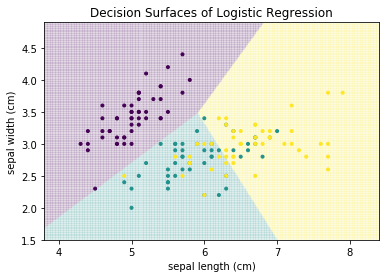

In [20]:
from sklearn.linear_model import LogisticRegression

plot_decision_surface(LogisticRegression(), X, Y, title="Decision Surfaces of Logistic Regression")

The decisions are made along lines that separate the feature space into different regions. A strength of logistic regression is that we can understand how each feature affects the classification. This is because we have a regression model of the logit function. We can reformulate this using the exponential function as follows:

$$
\begin{split}
&\ln \frac{P(Y=c)}{1-P(Y=c)} &= b_0 + b_1x_1 + ... + b_mx_m \\
\Rightarrow\quad &\frac{P(Y=c)}{1-P(Y=c)} &= \exp( b_0 + b_1x_1 + ... + b_mx_m ) \\
\Rightarrow\quad &odds(c) &= \exp( b_0 ) \cdot \Pi_{i=1}^m \exp(b_ix_i) \\
\end{split}
$$

Thus, the odds of the class are the product of these exponentials. The impact of feature $i, i=1, ..., m$ on the odds is $\exp(b_ix_i)$. From this follows that $exp(b_j)$ is the *odds ratio* of feature $i$. The odds ratio defines by how much the odds change due to this feature. For example, an odds ratio of 2 means that the odds would double if the value of the feature would be increased by one. In general, an odds ratio greater than one means that the odds increase if $x_i$ increases, an odds ratio of less than 1 means that the odds decrease if $x_i$ increases. Because the exponent of the coefficients is the odds ratio, the coefficient are also called the *log odds ratios*. 

We can also determine the odds ratios for our logistic regression model of the Iris. 

In [21]:
lr = LogisticRegression()
lr.fit(X,Y)
odds_df = pd.DataFrame(np.exp(lr.coef_), index=class_names, columns=X.columns)
odds_df['intercept'] = np.exp(lr.intercept_)
odds_df

,sepal length (cm),sepal width (cm),intercept
setosa,0.066610,10.216701,2733.180675
versicolor,1.845467,0.207923,6.328398
virginica,8.134952,0.470746,0.000058


We can see that the odds of Setosa increases strongly with the sepal width and decreases with the sepal length. Similarly, we can see that the odds of Versicolor and Virginica both increase with the sepal length and decrease with the sepal width. The intercept are the odds in case all features are exactly 0, i.e., $b_0$. Thus, all changes due to increasing feature values are with respect to the intercept. Because the intercept of Versicolor is larger than that of Virginica, there is a region in which the odds for Versicolor are larger, even though the increase in odds due to the sepal length is weaker and the decrease in odds is stronger than for Virginica. 

> Note: 
> 
> In this case the intercept is misleading. While the intercept for Setosa is very high, the coefficient for sepal length is very low. Given that the instances all have sepal lengths greater than four, this means that the impact of the large intercept vanishes because of this. For an in-depth analysis, the data should always be centered, e.g., with Z-score standardization. Moreover, in case the interpretation of the coefficients is the primary goal, you should consider to use a package like statsmodels instead of scikit-learn, because the regression analysis is more detailed, especially with respect to the statistical significance of the results. 

## Naive Bayes

Bayes Law is one of the fundamental theorems of stochastics and defined as

$$P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}.$$

If the random variable $X$ are our features, and the random variable $Y$ are our classes, $P(Y|X)$ is the probability of a class given the features. A perfect estimation of this would be an ideal scoring function for a score based classifier. In our case, we have

$$P(c|x_1, ..., x_m) = \frac{P(x_1, ..., x_m|c)P(c)}{P(x_1, ..., x_m)}$$

for a class $c \in C$ and an instance $(x_1, ..., x_m) \in \mathcal{F}$. Thus the probability of the class $c$ given the instance $(x_1, ..., x_m)$ is the probability of this instance given the class multiplied with the probability of observing this class and divided by the probability of observing the instance. The problem with Bayes Law is that it is usually very hard to accurately calculate $P(x_1, ..., x_m|c)$ and $P(x_1, ..., x_m)$, because this would require either the exact knowledge of the underlying joint probability distribution of all features, or an enormous amount of data, such that there are multiple observations for each possible instance. 

Instead, we go from Bayes Law to Naive Bayes. The core of Naive Bayes is the "naive assumption" that the features are conditionally independent given the class. For example, for the Iris data this would mean that the sepal length of Setosa is independent of the sepal width of Setosa. The data clearly shows that this is not the case. Hence, this assumption is almost never fulfilled and, therefore, naive. 

However, from a mathematical point of view, conditional independence given the class means that 

$$P(x_1, ..., x_m | c) = \Pi_{i=1}^m P(x_i|c),$$

i.e., we do not need the joint distribution of all features anymore, but can work with the distribution of the individual features instead, which is much less complex. When we substitute this into Bayes Law, we get

$$P(c|x_1, ..., x_m) = \frac{\Pi_{i=1}^m P(x_i|c)P(c)}{P(x_1, ..., x_m)}.$$

We still have the joint probability $P(x_1, ..., x_m)$ in the denominator. However, this probability is independent of the class $c$. Since we are not really interested in the exact probability, but only in a scoring function that we can use for classification, we can just leave out the denominator, because it does not affect which class scores highest for an instance. Thus, we get

$$score(c|c_1, ..., c_m) = \Pi_{i=1}^m P(x_i|c)P(c).$$

We can calculate this scoring function and assign the class with the highest score. The open question is how $P(x_i|c)$ and $P(c)$ are calculated. For $P(c)$ this is straightforward, as this can be estimated by counting how often each class is observed in the data. 

The two most popular approach for the estimation of $P(x_i|c)$ are *Multinomial Naive Bayes* and *Gaussian Naive Bayes*. Multinomial Naive Bayes calculates $P(x_i|c)$ by counting how often the value $x_i$ is observed for the class $c$. This approach works well with categorical data and counts. Multinomial Naive Bayes does not work well with continuous numeric data, because the counts are very often exactly 1, because it is unlikely to observe the exact same value multiple times with continuous data. Gaussian Naive Bayes is better suited for such data. Gaussian Naive Bayes assumes that each feature follows a normal distribution and estimates the probability $P(x_i|c)$ through the density function of a normal distribution that is fitted based on all instance values for a feature. 

Below, we can see the difference between Multinomial Naive Bayes and Gaussian Naive Bayes for the Iris data. 

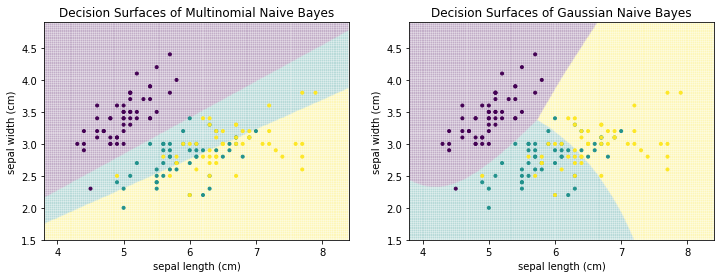

In [22]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

f, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_surface(MultinomialNB(), X, Y, title="Decision Surfaces of Multinomial Naive Bayes", ax=axes[0])
plot_decision_surface(GaussianNB(), X, Y, title="Decision Surfaces of Gaussian Naive Bayes", ax=axes[1])
plt.show()

The decision boundaries of Multinomial Naive Bayes are linear, whereas the decision surfaces of Gaussian Naive Bayes are quadratic. We can see that Multinomial Naive Bayes does not work well, especially the separation between green and yellow does not seem reasonable. This is expected, because the data is numeric. Gaussian Naive Bayes yields better results. 

## Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are an approach based on the optimization of the decision boundary. We only discuss the general concepts of SVMs, the complete mathematical description of how and why SVMs work is beyond our scope. The following visualization will help us to understand how SVMs determine the decision boundary. 

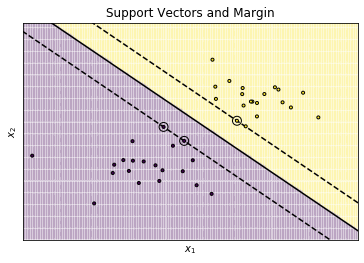

In [24]:
from sklearn.svm import SVC

# we create 40 separable points
np.random.seed(0)
X_linear = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y_linear = [0] * 20 + [1] * 20

# then we fit the SVM
clf = SVC(kernel='linear')
clf.fit(X_linear, Y_linear)

#  now we get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=Y_linear, zorder=10,
            edgecolors='k',  marker='.')

# now we plot the decision surface
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, alpha=0.1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.title('Support Vectors and Margin')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

The plot shows two groups: the dots in the yellow and purple areas. The data can easily be separated with a single line. Three such lines are shown in the plot. The solid line is as far away from the data as possible, the two dashed lines are so close to the data, the they actually intersect with data points. For the data depicted in the plot, the classification with all three lines as decision boundary would be the same. The difference between the three lines is the *margin*, i.e., the minimal distance from the line to any instance of each color. The dashed lines *minimize* the margin, i.e., there is no gap between the decision boundary and the observed data. The solid line *maximizes* the margin, i.e., this is the line that has the largest possible distance to yellow and the purple instances. Moreover, the distance to the closest yellow instances and the closest purple instances from the solid line is the same. 

The maximization of this distance is the optimization target of SVMs: try to find a line (or rather a hyperplane) that is as far away as possible from the actual data. The rational for this is roughly this:

- Our training data is only a sample. 
- It stands to reason that there are more data points, especially also more extreme data points, that are not part of the sample. 
- This means that these data points could fall into the region between the dashed lines, though it is likely that they are close to the dashed lines. 
- If we were to use one of the dashed lines as decision boundary, we would misclassify these extreme data points. 
- By maximizing the margin and using the solid line, we minimize the likelihood of misclassification due to extreme data points. 

The SVM gets their name from the *support vectors*. These are the circled instances on the dashed lines. These instances all have the the same distance to the decision boundary and are responsible for the margin. Training with only the support vectors would lead to the same result as training with all data, because there would still not be a better line to separate the data. 

However, SVMs would not be as popular as they are, if they could only learn the linear decision boundaries. The SVMs use the *feature expansion* to learn non-linear decision boundaries. The idea is to calculate new features and then find a linear decision boundary in this transformed feature space with a higher dimension. The linear decisions look non-linear in the lower dimensional space. The following figure visualizes this concept. 

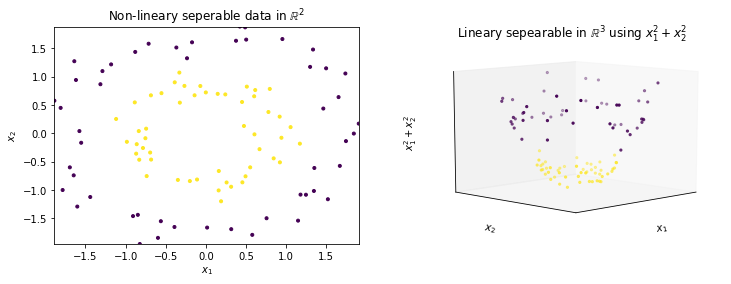

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D


X_circles, Y_circles = make_circles(noise=0.1, factor=0.5, random_state=1)
X_circles = StandardScaler().fit_transform(X_circles)

Z_circles = X_circles[:,0]*X_circles[:,0]+X_circles[:,1]*X_circles[:,1]

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_circles[:,0], X_circles[:,1],c=Y_circles, marker='.')
ax.set_xlim(X_circles[:,0].min(), X_circles[:,0].max())
ax.set_ylim(X_circles[:,1].min(), X_circles[:,1].max())
ax.set_title('Non-lineary seperable data in $\mathbb{R}^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.zaxis.set_rotate_label(False)
ax.scatter(X_circles[:,0], X_circles[:,1], Z_circles, c=Y_circles, marker='.')
ax.set_title('Lineary sepearable in $\mathbb{R}^3$ using $x_1^2+x_2^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2+x_2^2$', rotation=90)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.view_init(10, 45)
plt.show()


On the left side, we see two circles as sample data. It is obvious that there is no line that can separate the purple instances from the yellow instances. Thus, a linear separation with an SVM is not possible. The right side shows the expansion of the data with a new feature ($x_1^2+x_2^2). When we look at the data in three dimensions, we see that the yellow data is at the bottom and the purple data is at the top. We can just cut this data with a plane to separate the data linearly, which was not possible with the original dimensions. 

The feature expansion is done using *kernel functions*. The kernel function defines how new features are calculated. The above example used a *polynomial* kernel, where the feature space is expanded using a quadratic function. This transformation can still be visualized. Other kernel transformations are more complex, e.g., the *Radial Basis Function* (RBF). Here, the radial distances between the instances are the foundation of the kernel and the resulting feature space has infinite dimensions. This can neither be visualized, nor easily used for calculations. Thus, it is - in general - not possible to visualize how the expanded feature look like. Internally, SVMs avoid to actually expand the features using the *kernel trick*, which we do not discuss in greater detail. 

The shape of the decision surface depends on the kernel that is used for the feature expansion. The visualization below shows how the decision boundaries for the Iris data look like for a linear SVM (i.e., no kernel), a polynomial SVM, and a SVM with an RBF kernel. 

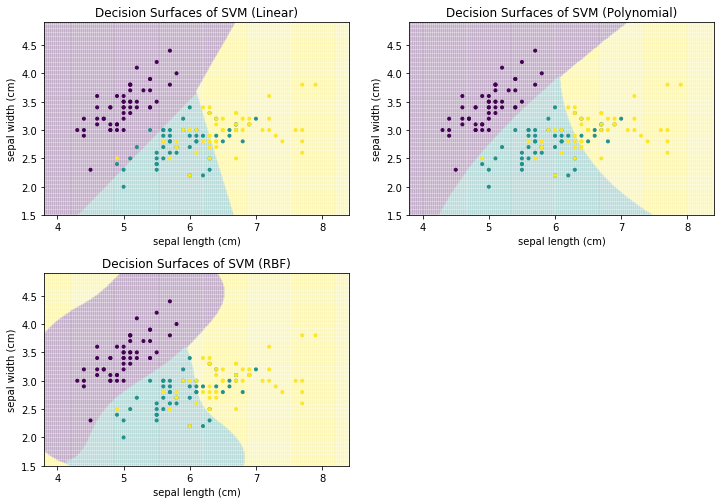

In [28]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(SVC(kernel="linear", C=0.025), X, Y, title="Decision Surfaces of SVM (Linear)", ax=axes[0,0])
plot_decision_surface(SVC(kernel='poly', degree=3, C=1), X, Y, title="Decision Surfaces of SVM (Polynomial)", ax=axes[0,1])
plot_decision_surface(SVC(kernel='rbf', gamma=2, C=1), X, Y, title="Decision Surfaces of SVM (RBF)", ax=axes[1,0])
axes[1,1].axis('off')
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

> Note:
>
> Kernel functions and SVMs have additional parameters. When you want to use SVMs in practice, you should learn more about these parameters, as they can make a big difference in the classification performance. SVMs can be very powerful, but this depends a lot on the selection of a good kernel function with appropriate parameters. 

## Neural Networks

Neural networks are based on the idea to mimic the communication between neurons in the human brain to make decisions. The general idea is relatively simple. Neurons are *activated* and *propagate* the values of their activation to other neurons. These neurons than determine their activation based on the propagated input from other neurons. 

A simple neural network may look like this. 

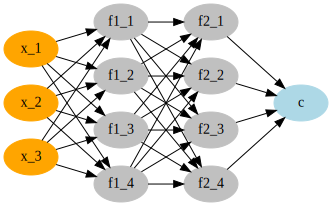

In [119]:
from graphviz import Digraph

network = Digraph()
network.attr(splines='line')
network.attr(rankdir='LR')

# Add three input neurons
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,4):
        layer.node('x_%i' % i, style='filled', color='orange')
    
# Add two hidden layers with 4 neurons
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,5):
        layer.node('f1_%i' % i, style='filled', color='grey')
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,5):
        layer.node('f2_%i' % i, style='filled', color='grey')

# Add one output neuron
with network.subgraph() as layer:
    layer.attr(rank='same')
    layer.node('c', style='filled', color='lightblue')
    
# Fully connected network between layers
for i in range(1,4):
    for j in range(1,5):
        network.edge('x_%i' % i, 'f1_%i' % j, label=label)
for i in range(1,5):
    for j in range(1,5):
        network.edge('f1_%i' % i, 'f2_%i' % j)
    network.edge('f2_%i' % i, 'c')
    
# Ensure correct order of nodes through invisible edges
for i in range(1,3):
    network.edge('x_%i' % i, 'x_%i' % (i+1), style='invis')
for i in range(1,4):
    network.edge('f1_%i' % i, 'f1_%i' % (i+1), style='invis')
    network.edge('f2_%i' % i, 'f2_%i' % (i+1), style='invis')
    
# Visualize the graph
display(network)

Each node in the network represents a neuron. The neurons are organized in layers. We differentiate between the *input layer* (orange), the *hidden layers* (gray), and the *output layer* (blue). The input layer has one neuron for each feature and each of these neurons represents one feature. The example has three such neurons for features $x_1$, $x_2$, and $x_3$. The output layer contains our value of interest, in our case, the predicted class $c$. The hidden layers contain additional neurons and are used to correlated the information from the input layer in order to determine the value of the neurons in the output layer. These layers are *hidden*, because users of neural networks do observe what happens in these layers directly, but only indirectly through the input and the output. The edges between the neuron define to which other neurons the activation of the neurons is passed. In the example above, the we show *fully connected layers*, i.e., the activation is forwarded to each neuron in the next layer. A network that consists only of fully connected layers is also known as *Multilayer Perceptron* (MLP). There are many different kinds of neural network structures. However, a discussion of the different kinds of networks and their use cases is out of scope. 

Each neuron gets uses the weighted sum of the inputs to calculate its activation function. For example, the value of $f_{1,3}$ is calculated as

$$f_{1,1} = f_{act}(\sum_{i=1}^3 w_i x_i)$$

where $f_{act}$ is the *activation function* of the neuron and $w_i$ are the *weights* of each input. The activation function further transforms the input. Different activation functions have different effects. The visualization below shows four often used activation functions. 

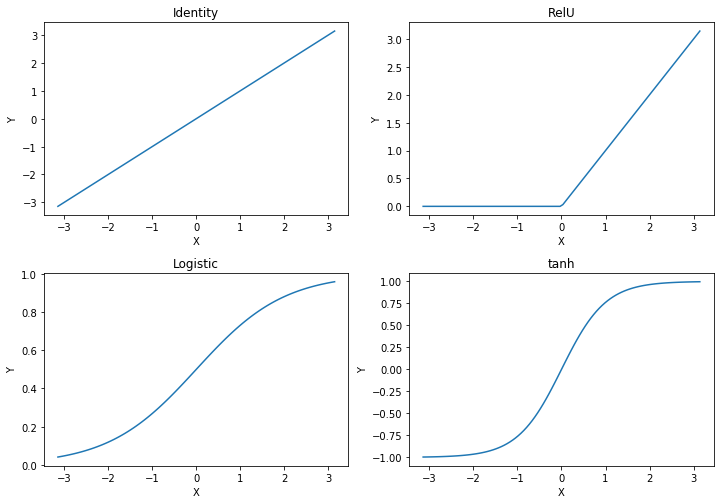

In [136]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0, 0].plot(np.linspace(-np.pi, np.pi, 100),
                np.linspace(-np.pi, np.pi, 100))
axes[0, 0].set_title("Identity")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")
axes[0, 1].plot(np.linspace(-np.pi, np.pi, 100),
                np.maximum(0, np.linspace(-np.pi, np.pi, 100)))
axes[0, 1].set_title("RelU")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")
axes[1, 0].plot(np.linspace(-np.pi, np.pi, 100), 1 /
                (1+np.exp(-np.linspace(-np.pi, np.pi, 100))))
axes[1, 0].set_title("Logistic")
axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("Y")
axes[1, 1].plot(np.linspace(-np.pi, np.pi, 100),
                np.tanh(np.linspace(-np.pi, np.pi, 100)))
axes[1, 1].set_title("tanh")
axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("Y")
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

The simplest activation function is the identity, i.e., the weighted input are the activation of the neuron. The *recitified linear unit*, commonly just referred to as *RelU* is a variant of the identify, where all negative values are set to 0, i.e., there is no negative activation. The Logistic function and the tanh both have "S shapes". We already know the logistic function from the logistic regression. The logistic function maps the input to a probability distribution: if the weighted input is negative, the probability is less than 0.5, if the weighted input is positive, the weighted input is greater then 0.5. At around -3/+3, the output converges to -1/+1. *tanh* is roughly linear, if the weighted input is between -1 and 1. For values outside this range, the output of tanh quickly converges to -1/+1. Thus, with the exception of the identity, the other activation function somewhat "normalize" extreme inputs. 

The user of the neural network has to define the complete structure of the neural network, i.e., how many hidden layers there are, how many neurons there are on each layer, how the neurons are connected with each other to propagate their activations, and the activation function. The training of the neural network is the estimation of the weights, i.e., the influence of each input neuron on the activation function of a neuron. Below, we show how the choice of the activation function affects the training of a MLP for the Iris data, with three fully connected hidden layers that have 100 neurons each. 

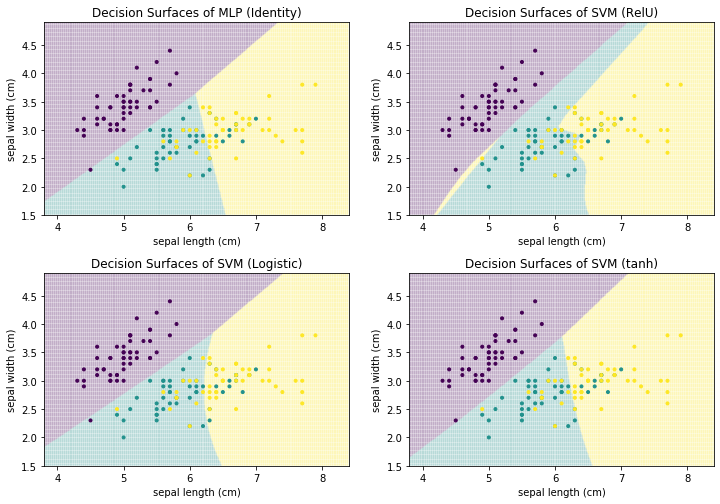

In [132]:
from sklearn.neural_network import MLPClassifier

f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='identity'), X, Y, title="Decision Surfaces of MLP (Identity)", ax=axes[0, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='relu'), X, Y, title="Decision Surfaces of SVM (RelU)", ax=axes[0, 1])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000,
                                    activation='logistic'), X, Y, title="Decision Surfaces of SVM (Logistic)", ax=axes[1, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='tanh'), X, Y, title="Decision Surfaces of SVM (tanh)", ax=axes[1, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

As we can see, the decision surfaces all look different. Identity has linear decision boundary, Logistic and tanh both have a small curve in the decision boundaries and the shape of RelU can only be described as irregular. RelU also shows us the big risk when using neural networks: overfitting. Three fully connected layers with 100 neurons on each layer already have $2*(100*100)=20000$ weights that must be estimated, without even accounting for the weights between the input layer and the first hidden layer, and the last hidden layer and the output layer. This huge amount of parameters that must be estimated allowed the MLP with the RelU function to carve out a small yellow area for a single instance. This is a general problem of neural networks: if they are too small, they do not allow for good performance, if they are too large, there will be overfitting. Therefore, any kind of neural network should be used with care and the parameters should be carefully selected, e.g., with the help of a validation set, to prevent overfitting. 

> Note:
>
> This is not a "deep" dive into neural networks, we only scratch the surface of a vast amount of options you have with neural networks. There are different layer structures, e.g., convolution, pooling, or drop-out layers. Networks can also have "backward edges", leading to *recurrent* neural networks, or even have special kinds of neurons like Long-Short-Term-Memory (LSTM) networks. In general, this things lead to different "network architectures", where different architectures are well suited for different purposes, e.g., convolutional neural networks for object recognition, LSTM networks for text mining, or generative adversarial networks (GANs) to improve training or create artificial data. Thus, before using deep learning, there is a vast amount of options that you must be aware of, so you can define appropriate network structures. Please be aware that while powerful, neural networks usually require large amounts of data to achieve a good performance. Thus, if you only have a limited amount of data available, other options are often better than neural networks. 

## Comparison of Classification Models

The seven different approaches for classification all have different strengths and weakness. Each of the algorithms may be the best choice, depending on the circumstances. Within this section, we directly compare the algorithms to each other. 

### Decision Surfaces

We start by comparing the decision surfaces on different data sets. We summarize the results for the Iris data that we used so far below. 

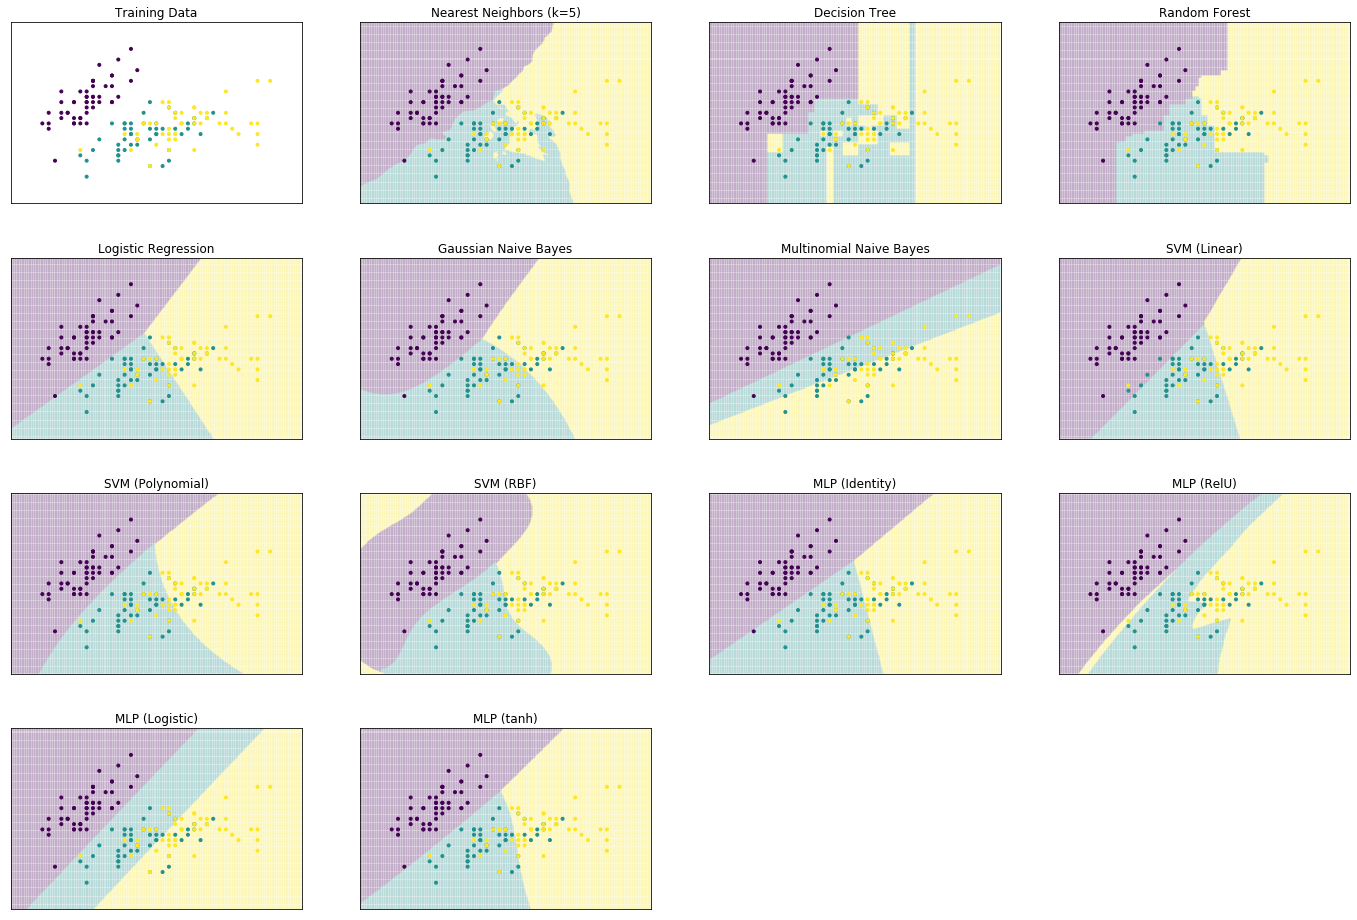

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression

def plot_clf_comparison(X, Y):
    classifiers = [KNeighborsClassifier(5),
                   DecisionTreeClassifier(),
                   RandomForestClassifier(n_estimators=100, max_depth=3),
                   LogisticRegression(),
                   GaussianNB(),
                   MultinomialNB(),
                   SVC(kernel="linear", C=0.025, probability=True),
                   SVC(kernel='poly', degree=3, C=1, probability=True),
                   SVC(kernel='rbf', gamma=2, C=1, probability=True),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='identity'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='relu'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='logistic'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='tanh')]

    clf_names = ["Nearest Neighbors (k=5)",
                 "Decision Tree",
                 "Random Forest",
                 "Logistic Regression",
                 "Gaussian Naive Bayes",
                 "Multinomial Naive Bayes",
                 "SVM (Linear)",
                 "SVM (Polynomial)",
                 "SVM (RBF)",
                 "MLP (Identity)",
                 "MLP (RelU)",
                 "MLP (Logistic)",
                 "MLP (tanh)"]
    f, axes = plt.subplots(4, 4, figsize=(24, 14))
    axes[0, 0].set_xlim(X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5)
    axes[0, 0].set_ylim(X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5)
    axes[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, marker='.')
    axes[0, 0].set_title('Training Data')

    cnt = 1
    for clf, name in zip(classifiers, clf_names):
        i = int(cnt/4)
        j = cnt % 4
        plot_decision_surface(clf, X, Y, title=name, ax=axes[i, j])
        cnt += 1
    while cnt < 16:
        i = int(cnt/4)
        j = cnt % 4
        axes[i, j].axis('off')
        cnt += 1
    plt.setp(plt.gcf().get_axes(), xticks=[],
             yticks=[], ylabel=None, xlabel=None)
    plt.subplots_adjust(left=None, bottom=0, right=None,
                        top=None, wspace=None, hspace=0.3)


plot_clf_comparison(X, Y)
plt.show()

We first note that all classifiers are good at separating purple from the others. However, there are major differences regarding the separation of teal and yellow. The $k$-Nearest Neighbor and Decision Tree all have islands of teal within the yellow area, which may be overfitting. This is possible, because these classifiers work instance-based, respectively using a set of rules that can describe disjoint regions. This would also be easily possible with Random Forests, but is avoided due to the small trees that are used for the ensemble. The decision boundaries of all other classifiers are describe by continuous functions, which usually do not allow such islands. The only really bad classifier is the Multinomial Naive Bayes, which is to be expected (also for the other examples), because we consider numeric data, for which Multinomial Naive Bayes is not well suited. 

We can observe that while the decision surfaces are very similar in the regions where training data is located, there are big differences, in regions further away from the training data. This is a general property that you should be aware with classification: it is unclear how well the classifiers generalize beyond the distribution of the training data. Thus, classification models can only be used reliable, if the training data has the same distribution as the test data. 

The next data set we consider are two half-moons that are very close to each other, but that have (almost) no overlap. 

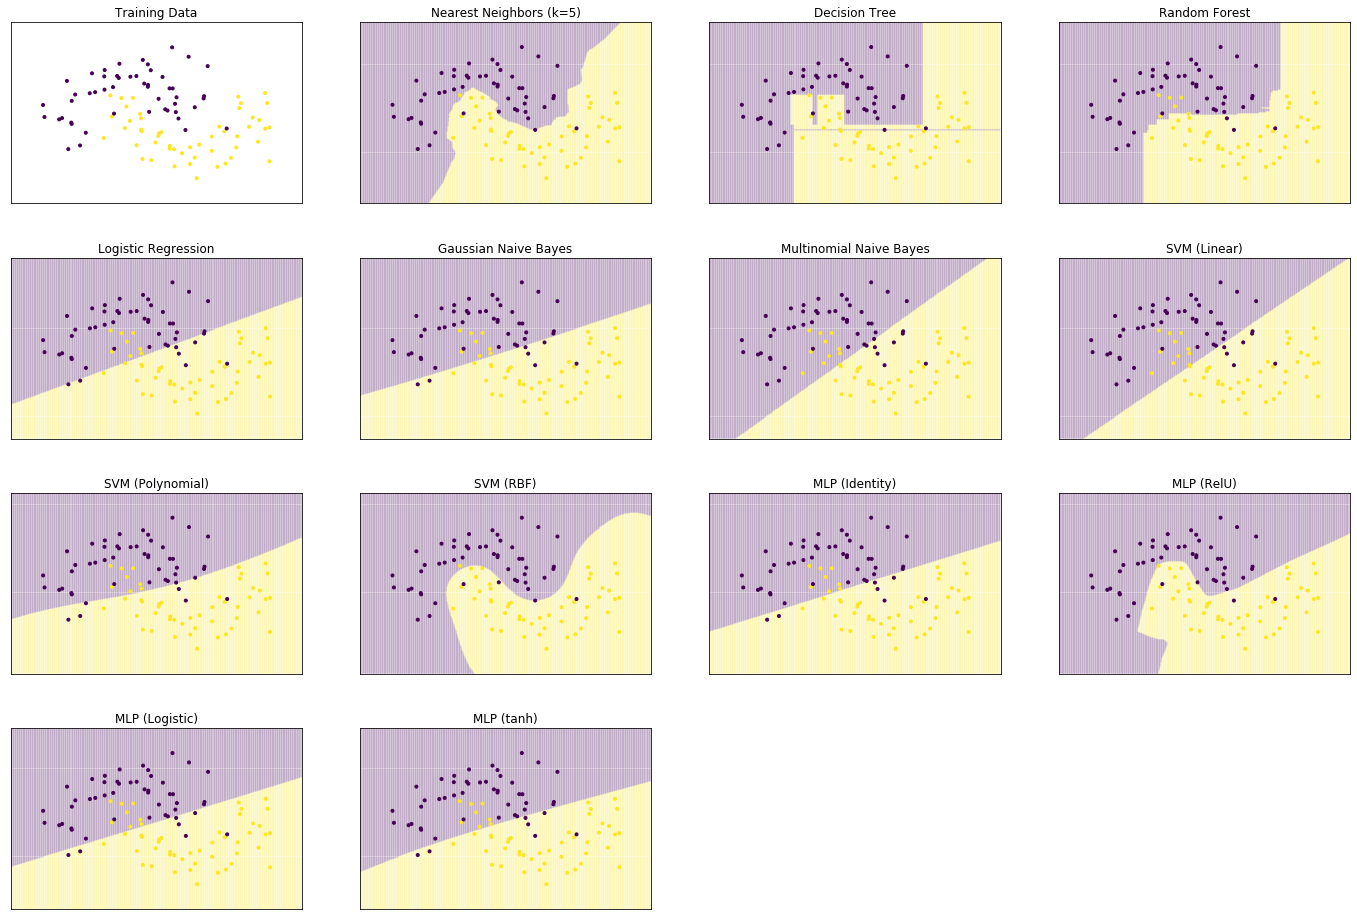

In [9]:
from sklearn.datasets import make_moons

X_moons, Y_moons = make_moons(noise=0.3, random_state=0)
plot_clf_comparison(pd.DataFrame(X_moons+3),Y_moons)
plt.show()

With this data, we start to clearly see the limitations of classifiers. Logistic regression, Naive Bayes, the linear and polynomial SVM, as well as all MLPs except RelU fail to separate the data and instead have linear (or almost linear) decision boundary with misclassification in the regions where the moons overlap. While these models are not extremely bad, because most data is classified correctly, they fail to derive decision boundary that match the actual distribution of the classes. Other algorithms are better able to differentiate between the two half-moons and the decision boundary match the actual shape of two classes. We see a slight tendency for overfitting again with the Decision Tree.

The next data sets is a circle within another circle. Again, the two data sets are very close to each other, but only very few instances actually overlap. 

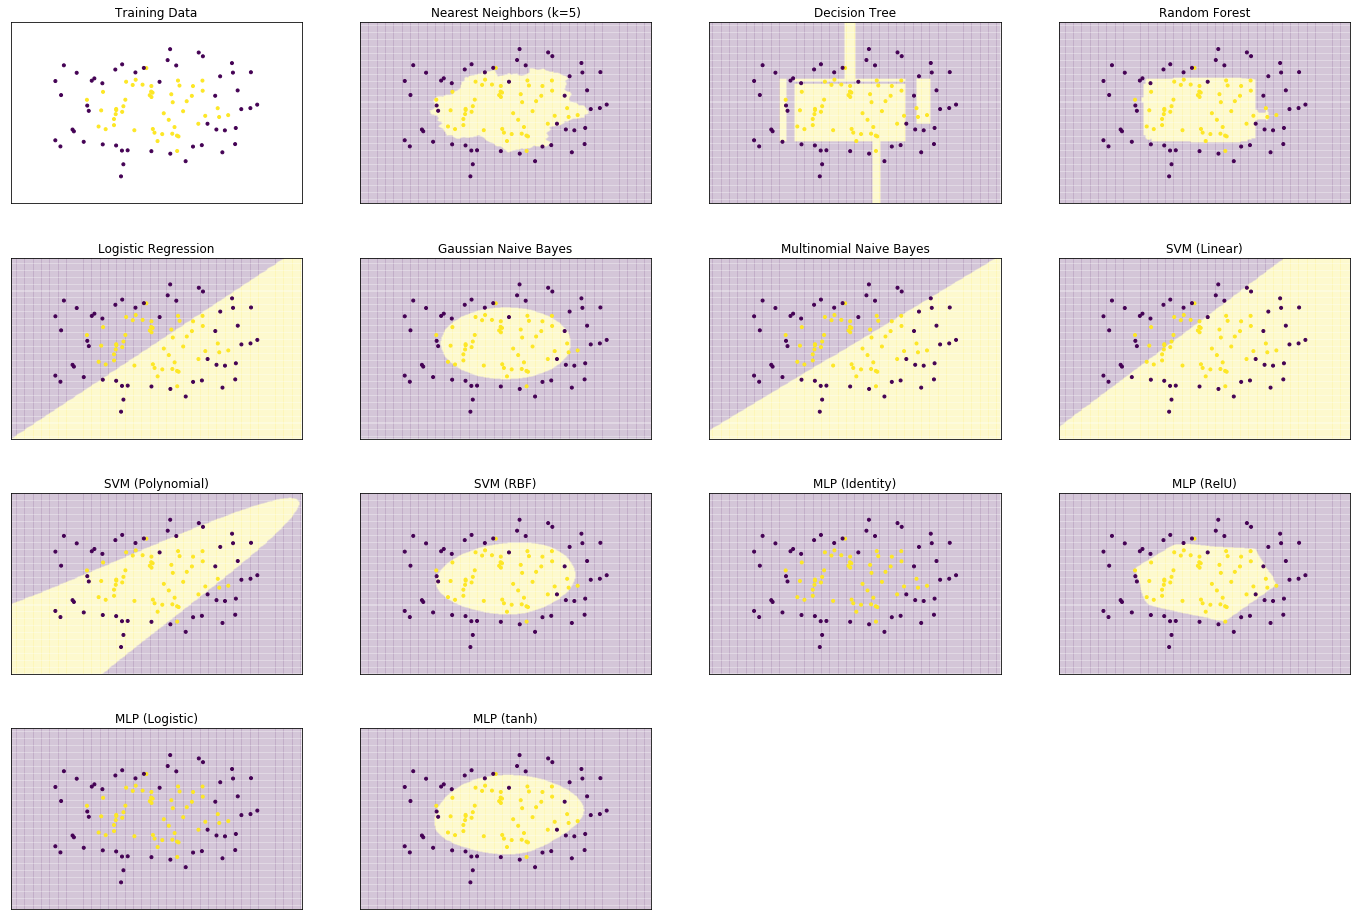

In [10]:
from sklearn.datasets import make_circles

X_circles, Y_circles = make_circles(noise=0.2, factor=0.5, random_state=1)
plot_clf_comparison(pd.DataFrame(X_circles+3), Y_circles)
plt.show()

The results are, in general, similar as or the half-moons: the algorithms that worked for the half-moons also work well for the cirlcles. However, there are also some algorithms that failed on the half-moons but perform well with the circles, i.e., the Gaussian Naive Bayes, and the MLP with tanh as activation function. This can be explained by the fact that the the almost linear separation worked reasonably well with the half-moons. Thus, there was not so much pressure to use a different, more complex decision surface. This is not the case with the circles, that only work with round decision surfaces. This put pressure on the internal optimization of the algorithms and forced them to determine the better and more complex decision boundaries. 

Finally, we consider clearly separated data with a large gap. 

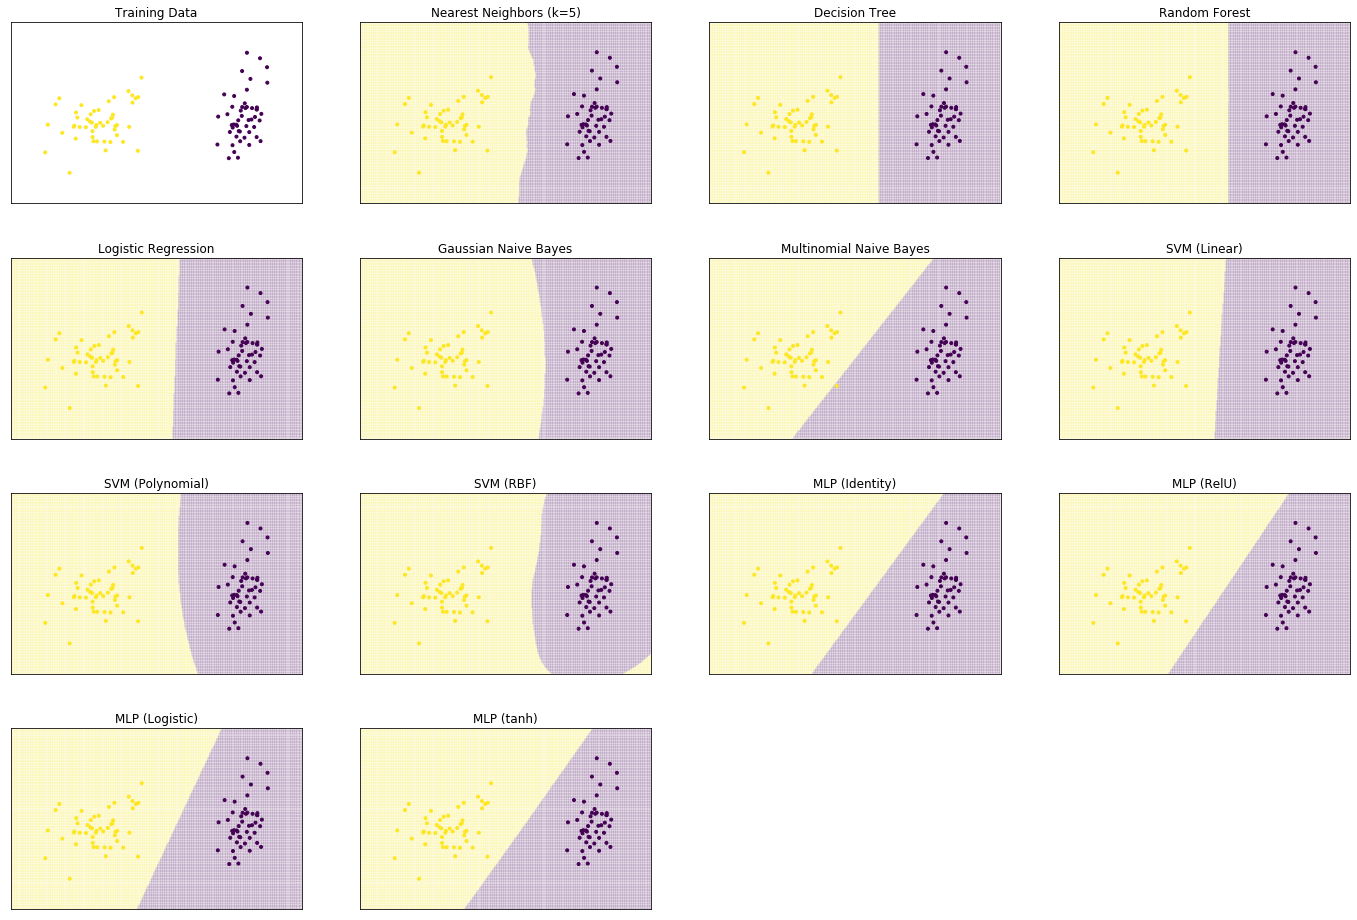

In [11]:
from sklearn.datasets import make_classification

X_linear, Y_linear = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
plot_clf_comparison(pd.DataFrame(X_linear+3), Y_linear)
plt.show()

As expected, all algorithms can easily predict this data correctly. However, we observe differences in the margins, that we already know from the SVM. We see that most algorithms estimate the decision boundary such that the margin is large. However, the MLP and also the Multinomial Naive Bayes have decision boundaries with small margins. For the Multinomial Naive Bayes, this is likely because the numeric data and not a general failing of the algorithm. For the MLP, this is because the optimization criterion completely ignores the margin. As a result, the MLP will use the first separating line that is found, regardless of the margin. Since no other line would be an improvement in terms of misclassifications, they are not considered improvements and the optimization stops.

### Execution Time

In [ ]:
from sklearn.datasets import make_moons
import timeit

classifiers = [KNeighborsClassifier(5),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=100),
               LogisticRegression(),
               GaussianNB(),
               MultinomialNB(),
               SVC(kernel="linear", C=0.025, probability=True),
               SVC(kernel='poly', degree=3, C=1, probability=True),
               SVC(kernel='rbf', gamma=2, C=1, probability=True),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='identity'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='relu'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='logistic'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='tanh')]

clf_names = ["Nearest Neighbors (k=5)",
             "Decision Tree",
             "Random Forest",
             "Logistic Regression",
             "Gaussian Naive Bayes",
             "Multinomial Naive Bayes",
             "SVM (Linear)",
             "SVM (Polynomial)",
             "SVM (RBF)",
             "MLP (Identity)",
             "MLP (RelU)",
             "MLP (Logistic)",
             "MLP (tanh)"]


instances = [1e3, 1e4, 1e5, 1e6]
runtime_fit = []
runtime_predict = []
for clf in classifiers:
    runtime_fit.append([])
    runtime_predict.append([])
for num_instances in instances:
    X_runtime, Y_runtime = make_moons(noise=0.3, random_state=0, n_samples=int(num_instances))
    X_runtime = X_runtime+3 # ensures no negative values
    for clf_cnt, clf in enumerate(classifiers):
        print(clf)
        start_time = timeit.default_timer()
        clf.fit(X_runtime, Y_runtime)
        elapsed = timeit.default_timer() - start_time
        runtime_fit[clf_cnt].append(elapsed)
        start_time = timeit.default_timer()
        clf.predict(X_runtime)
        elapsed = timeit.default_timer() - start_time
        runtime_predict[clf_cnt].append(elapsed)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
for runtime, name in zip(runtime_fit, clf_names):
    axes[0].plot(instances, runtime, label=name)
axes[0].set_ylabel('Runtime in Seconds')
axes[0].set_xlabel('Number of Instances')
axes[0].set_title('Training Time')

for runtime, name in zip(runtime_predict, clf_names):
    axes[1].plot(instances, runtime, label=name)
axes[1].set_ylabel('Runtime in Seconds')
axes[1].set_xlabel('Number of Instances')
axes[1].set_title('Prediction Time')
axes[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(instances)
plt.xscale('log')
plt.yscale('log')
plt.show()

### Explanatory Value and Concise Representation

### Categorical Features

### Missing Features

### Correlated Features

### Summary